<h1><center>
    ECE 438 - Laboratory 5b<br/>
    Digital Filter Design (Week 2)<br/>
    <small>Last updated on February 20, 2022</small><br/>
    <br/>
    Date:2/16<br/>
    Section:<br/>
</center></h1>

|Name |Signature |Time spent outside lab|
|:---:|:---:|:---:|
|Student Name #1 Ruixiang Wang| | |
|Student Name #2 [---%]| | |

||Below expectations| Lacks in some respect|Meets all expectations|
|:---:|:---:|:---:|:---:|
|**Completeness of the report**||||
|**Organization of the report**||||
|**Quality of figures**: *Correctly labeled with title, x-axis, y-axis, and name(s)*||||
|**Understanding of filter design using standard windows (25 pts)**: *Time domain and DTFT plots of windows, table of spectral parameters, impulse response and DTFT of designed filter, questions*||||
|**Understanding of filter design using the Kaiser window (25 pts)**: *Time domain and DTFT plots of windows, DTFT of designed filter, DTFT of filtered audio, questions*||||
|**Understanding of FIR filter design using Parks-McClellan algorithm (25 pts)**: *DTFT of designed filter, DTFT of filtered audio, questions*||||
|**Understanding of IIR filter design using Numerical optimization (25 pts)**: *Python code, DTFT of desired and designed filters, questions*||||

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import IPython.display as ipd
from helper import DTFT, hanning, hamming, blackman, kaiser, firpmord
from scipy import signal, optimize

In [4]:
# make sure the plot is displayed in this notebook
%matplotlib inline
# specify the size of the plot
plt.rcParams['figure.figsize'] = (12, 6)

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

<h3 style="color:red;"><left>Exercise 2</left></h3>

**1. Plot the rectangular window function of length $21$.**

<StemContainer object of 3 artists>

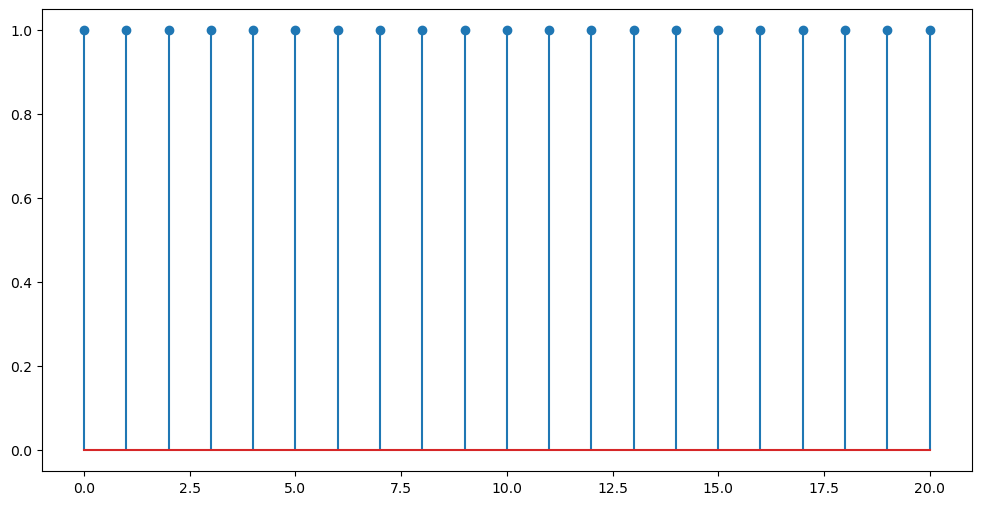

In [6]:
N = 21
n = np.linspace(0, N-1, N)

w_rect = [0]*N
for i in range(0, 21, 1):
    w_rect[i] = 1

plt.stem(n, w_rect)

**2. Plot the Hanning window function of length $21$.**

**Note**: you may use the function `h = hanning(N)` provided in `helper.py`.

<StemContainer object of 3 artists>

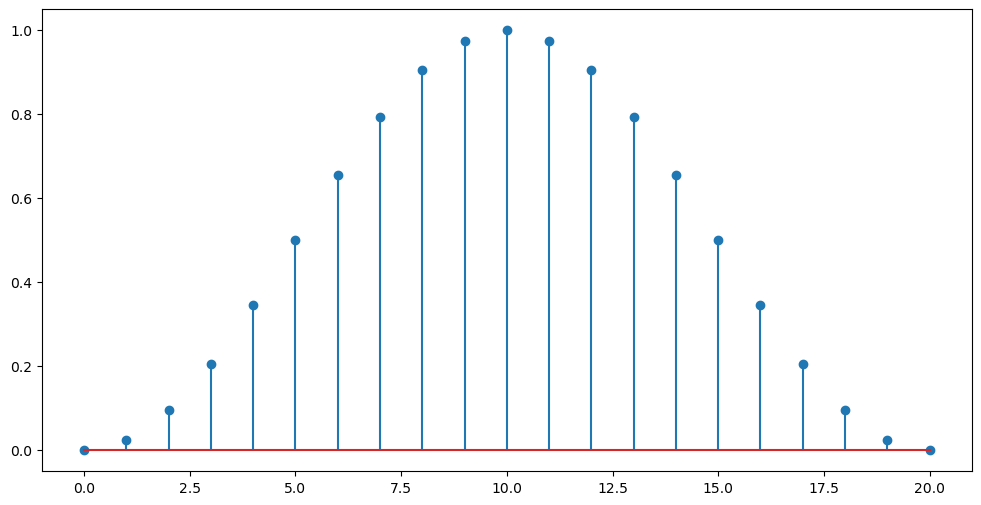

In [7]:
N = 21
n = np.linspace(0, N-1, N)

w_hanning = hanning(21)

plt.stem(n, w_hanning)

**3. Plot the Hamming window function of length $21$.**

**Note**: you may use the function `h = hamming(N)` provided in `helper.py`.

<StemContainer object of 3 artists>

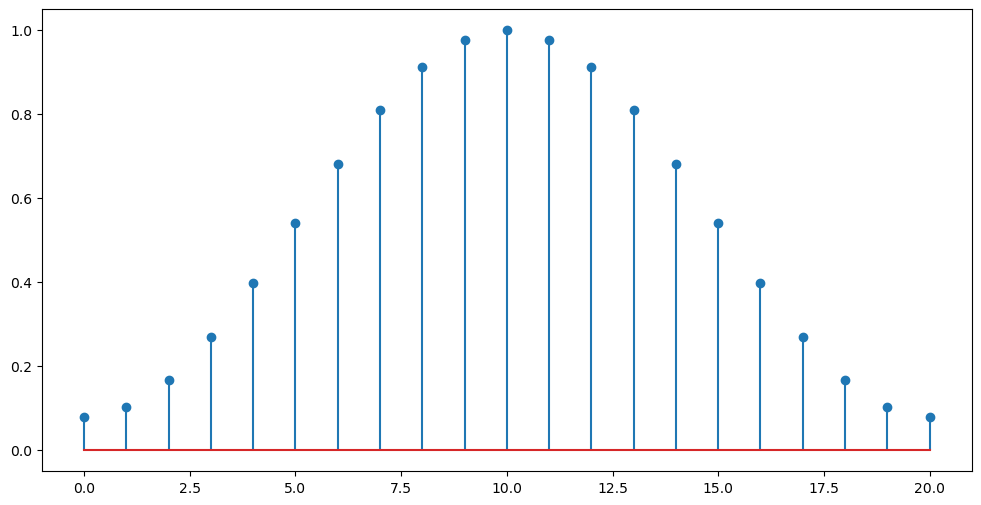

In [8]:
N = 21
n = np.linspace(0, N-1, N)

w_hamming = hamming(21)

plt.stem(n, w_hamming)

**4. Plot the Blackman window function of length $21$.**

**Note**: you may use the function `h = blackman(N)` provided in `helper.py`.

<StemContainer object of 3 artists>

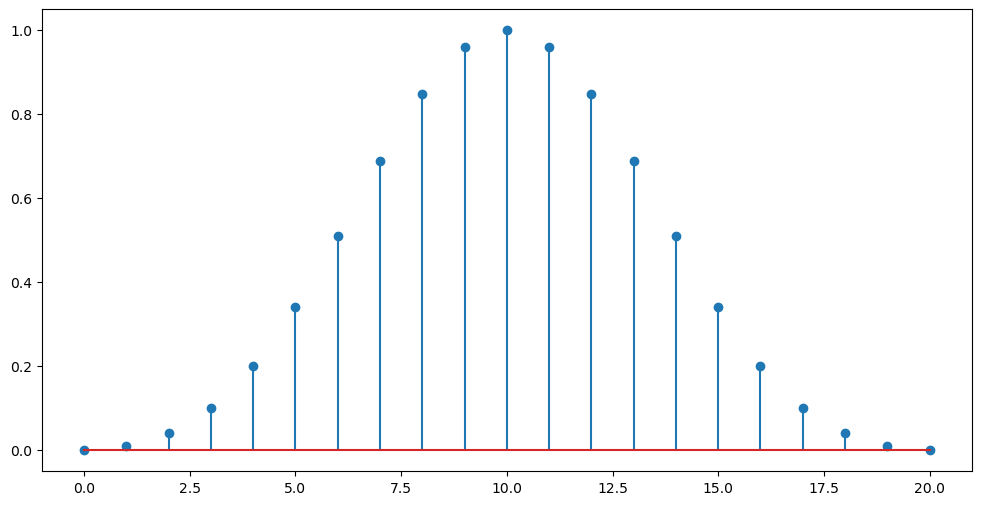

In [9]:
N = 21
n = np.linspace(0, N-1, N)

w_blackman = blackman(21)


plt.stem(n, w_blackman)


---

In Q9, we are going to make some measurements in the plots to be generated in Q5, Q6, Q7, Q8, so we temporarily make the plots interactive by running the following cell block. **Plot just one figure in each cell block and make sure you add the command `plt.figure()` before calling `plt.plot()`.**

In [10]:
# temporarily make the plot interactive
%matplotlib notebook
# specify the size of the plot
plt.rcParams['figure.figsize'] = (12, 6)

**5. Compute and plot the DTFT magnitude of the rectangular window function. Plot the magnitude on a decibel scale (i.e., plot $20\log_{10}|W(e^{j\omega})|$). Also, use at least 512 sample points in computing the DTFT.**

**Hint:** Use the function ```DTFT(window, 512)``` to compute the DTFT.

<IPython.core.display.Javascript object>


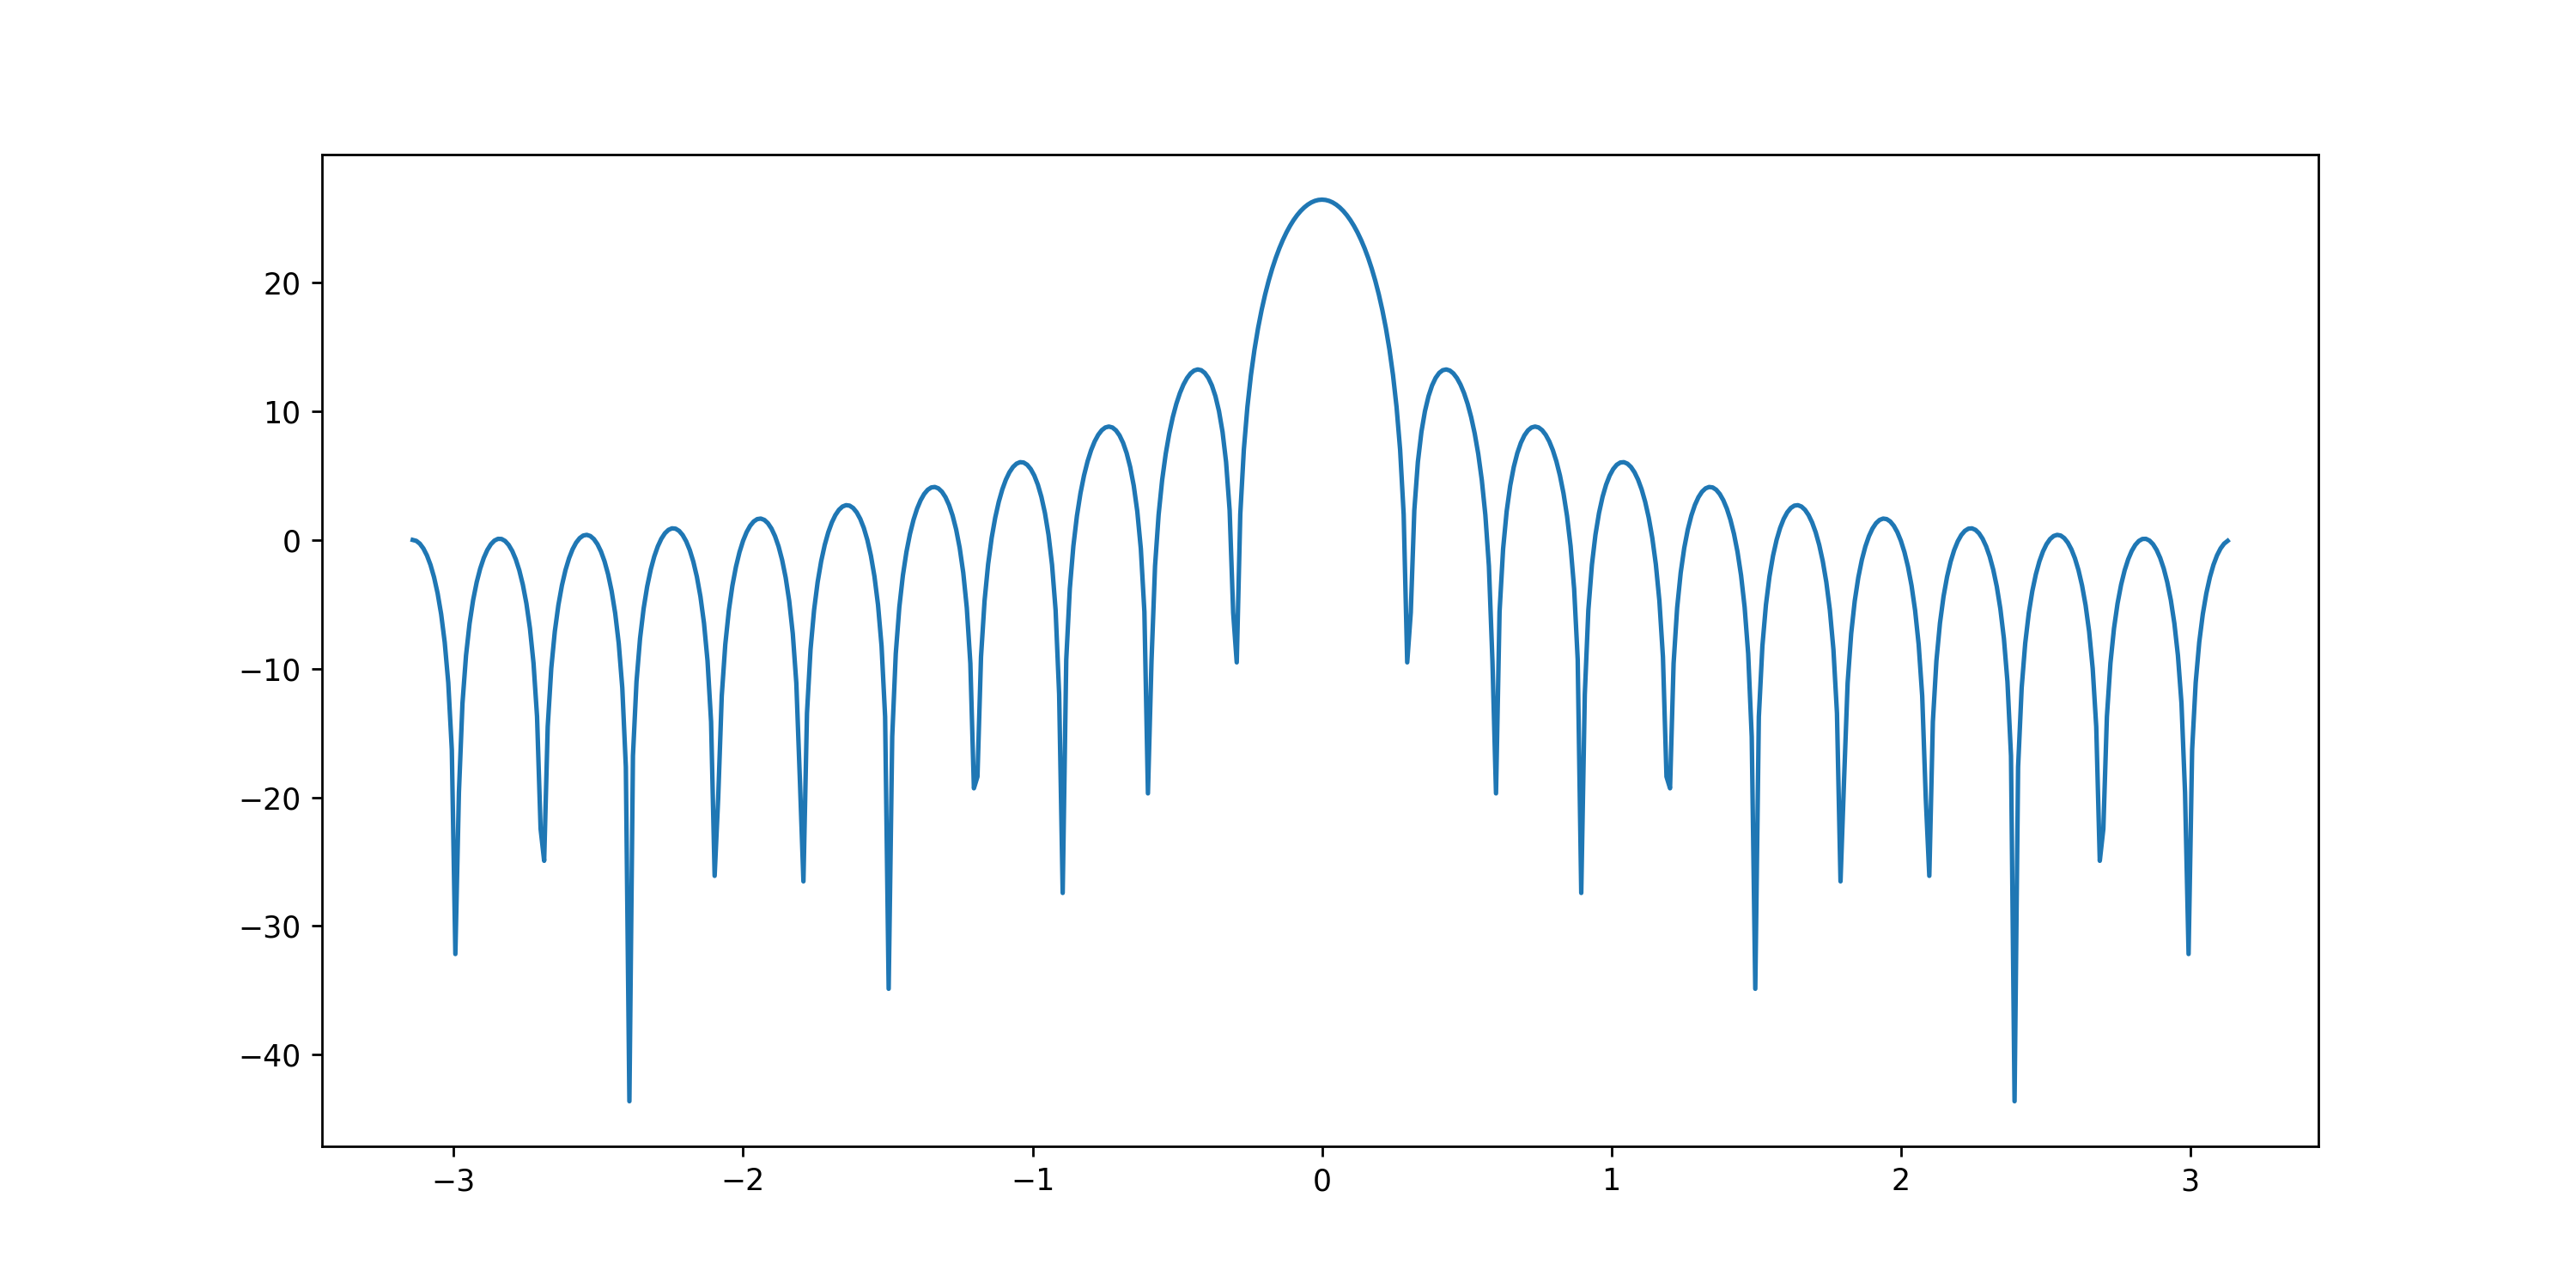

In [11]:
w_rect_DTFT, w = DTFT(w_rect, 512)

w_rect_DTFT_mag = 20*np.log10(np.abs(w_rect_DTFT))

plt.figure()
plt.plot(w, w_rect_DTFT_mag)

**6. Compute and plot the DTFT magnitude of the Hanning window function. Plot the magnitude on a decibel scale (i.e., plot $20\log_{10}|W(e^{j\omega})|$). Also, use at least 512 sample points in computing the DTFT.**

**Hint:** Use the function ```DTFT(window, 512)``` to compute the DTFT.

C:\Users\rxw14\AppData\Local\Temp\ipykernel_31280\2921433596.py:3: RuntimeWarning: divide by zero encountered in log10
  w_hanning_DTFT_mag = 20*np.log10(np.abs(w_hanning_DTFT))


<IPython.core.display.Javascript object>


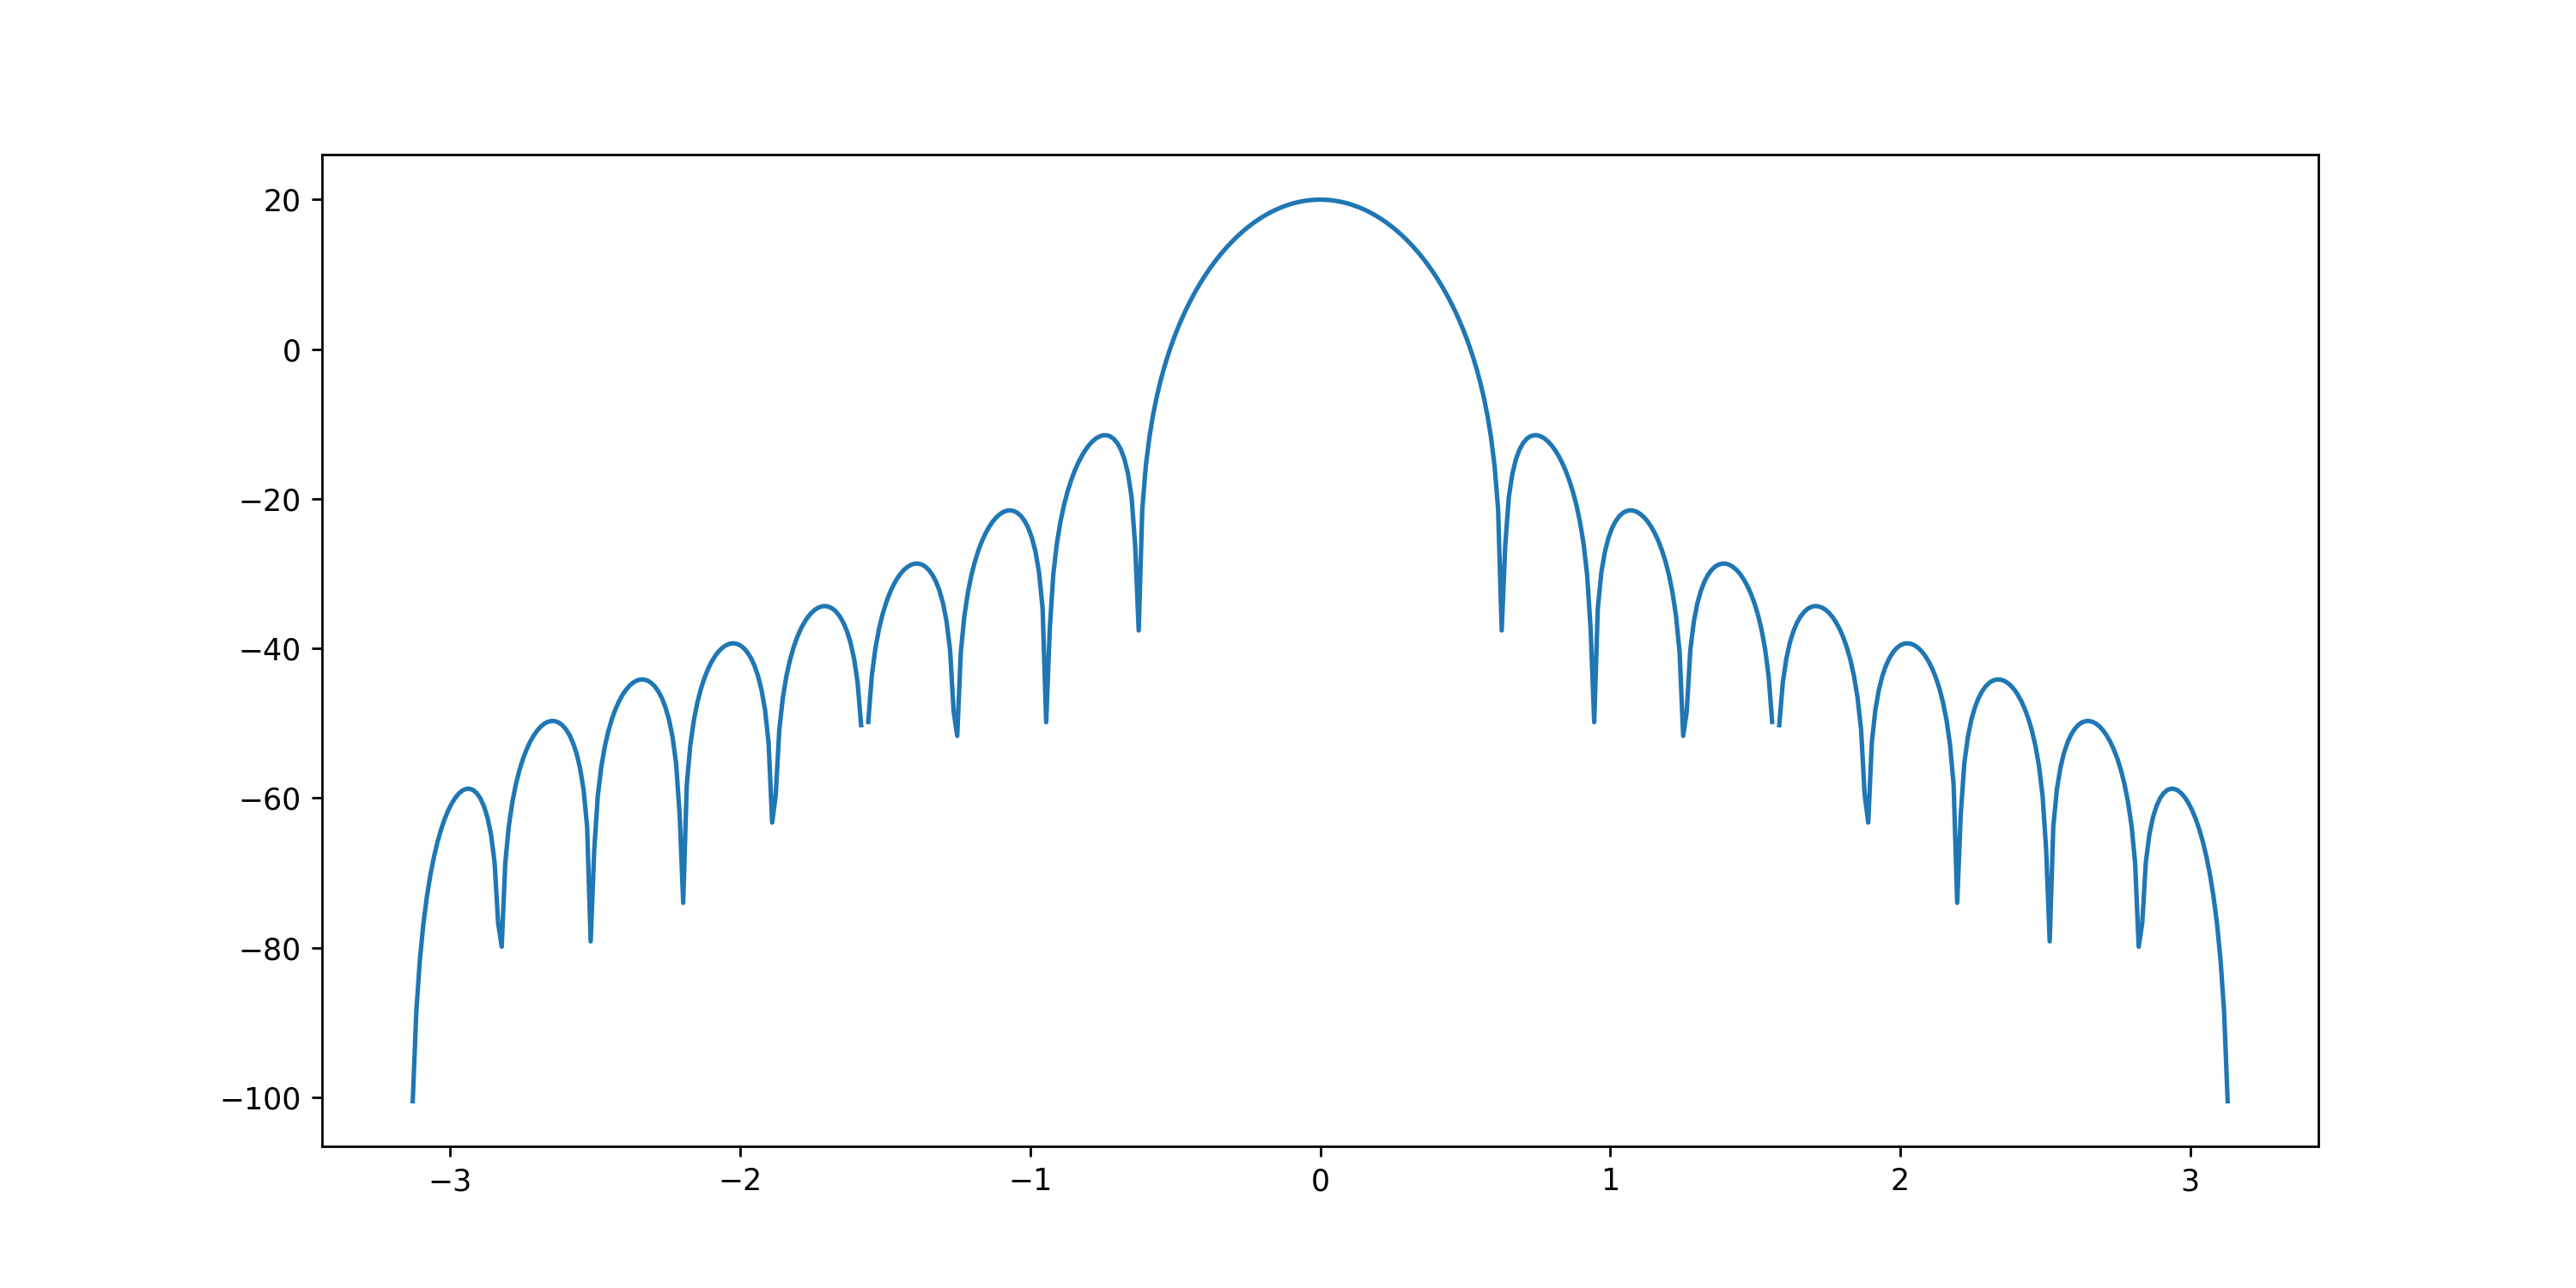

In [12]:
w_hanning_DTFT, w = DTFT(w_hanning, 512)

w_hanning_DTFT_mag = 20*np.log10(np.abs(w_hanning_DTFT))

plt.figure()
plt.plot(w, w_hanning_DTFT_mag)

**7. Compute and plot the DTFT magnitude of the Hamming window function. Plot the magnitude on a decibel scale (i.e., plot $20\log_{10}|W(e^{j\omega})|$). Also, use at least 512 sample points in computing the DTFT.**

**Hint:** Use the function ```DTFT(window, 512)``` to compute the DTFT.

<IPython.core.display.Javascript object>


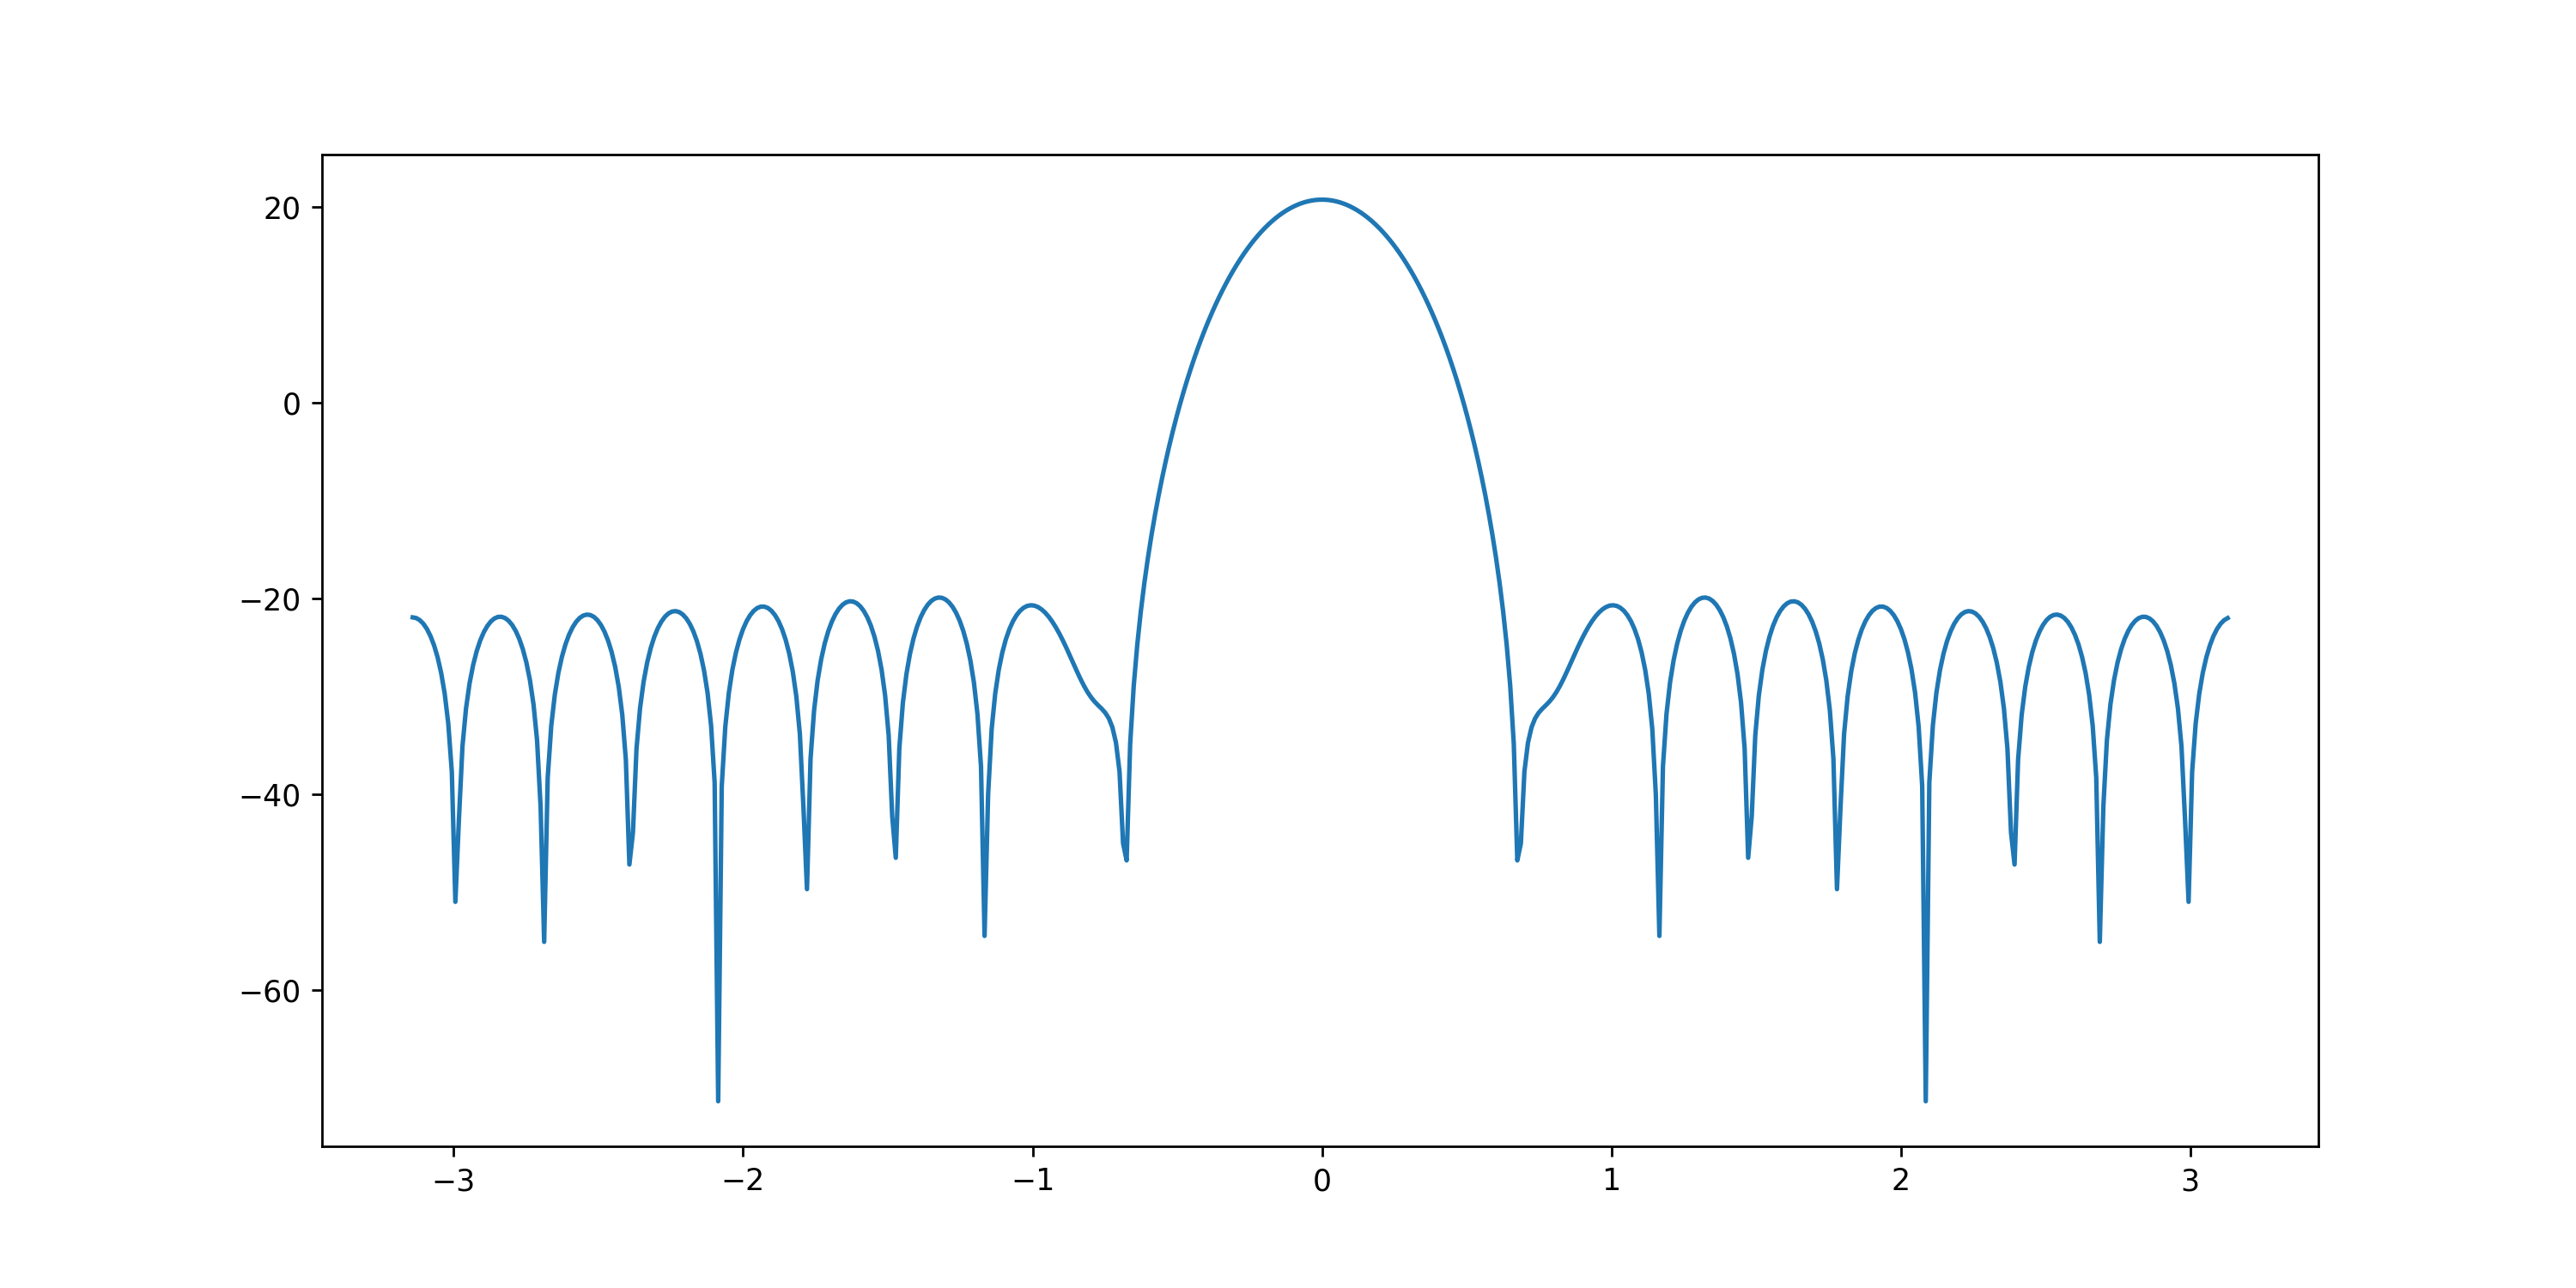

In [14]:
w_hamming_DTFT, w = DTFT(w_hamming, 512)

w_hamming_DTFT_mag = 20*np.log10(np.abs(w_hamming_DTFT))

plt.figure()
plt.plot(w, w_hamming_DTFT_mag)

**8. Compute and plot the DTFT magnitude of the Blackman window function. Plot the magnitude on a decibel scale (i.e., plot $20\log_{10}|W(e^{j\omega})|$). Also, use at least 512 sample points in computing the DTFT.**

**Hint:** Use the function ```DTFT(window, 512)``` to compute the DTFT.

<IPython.core.display.Javascript object>


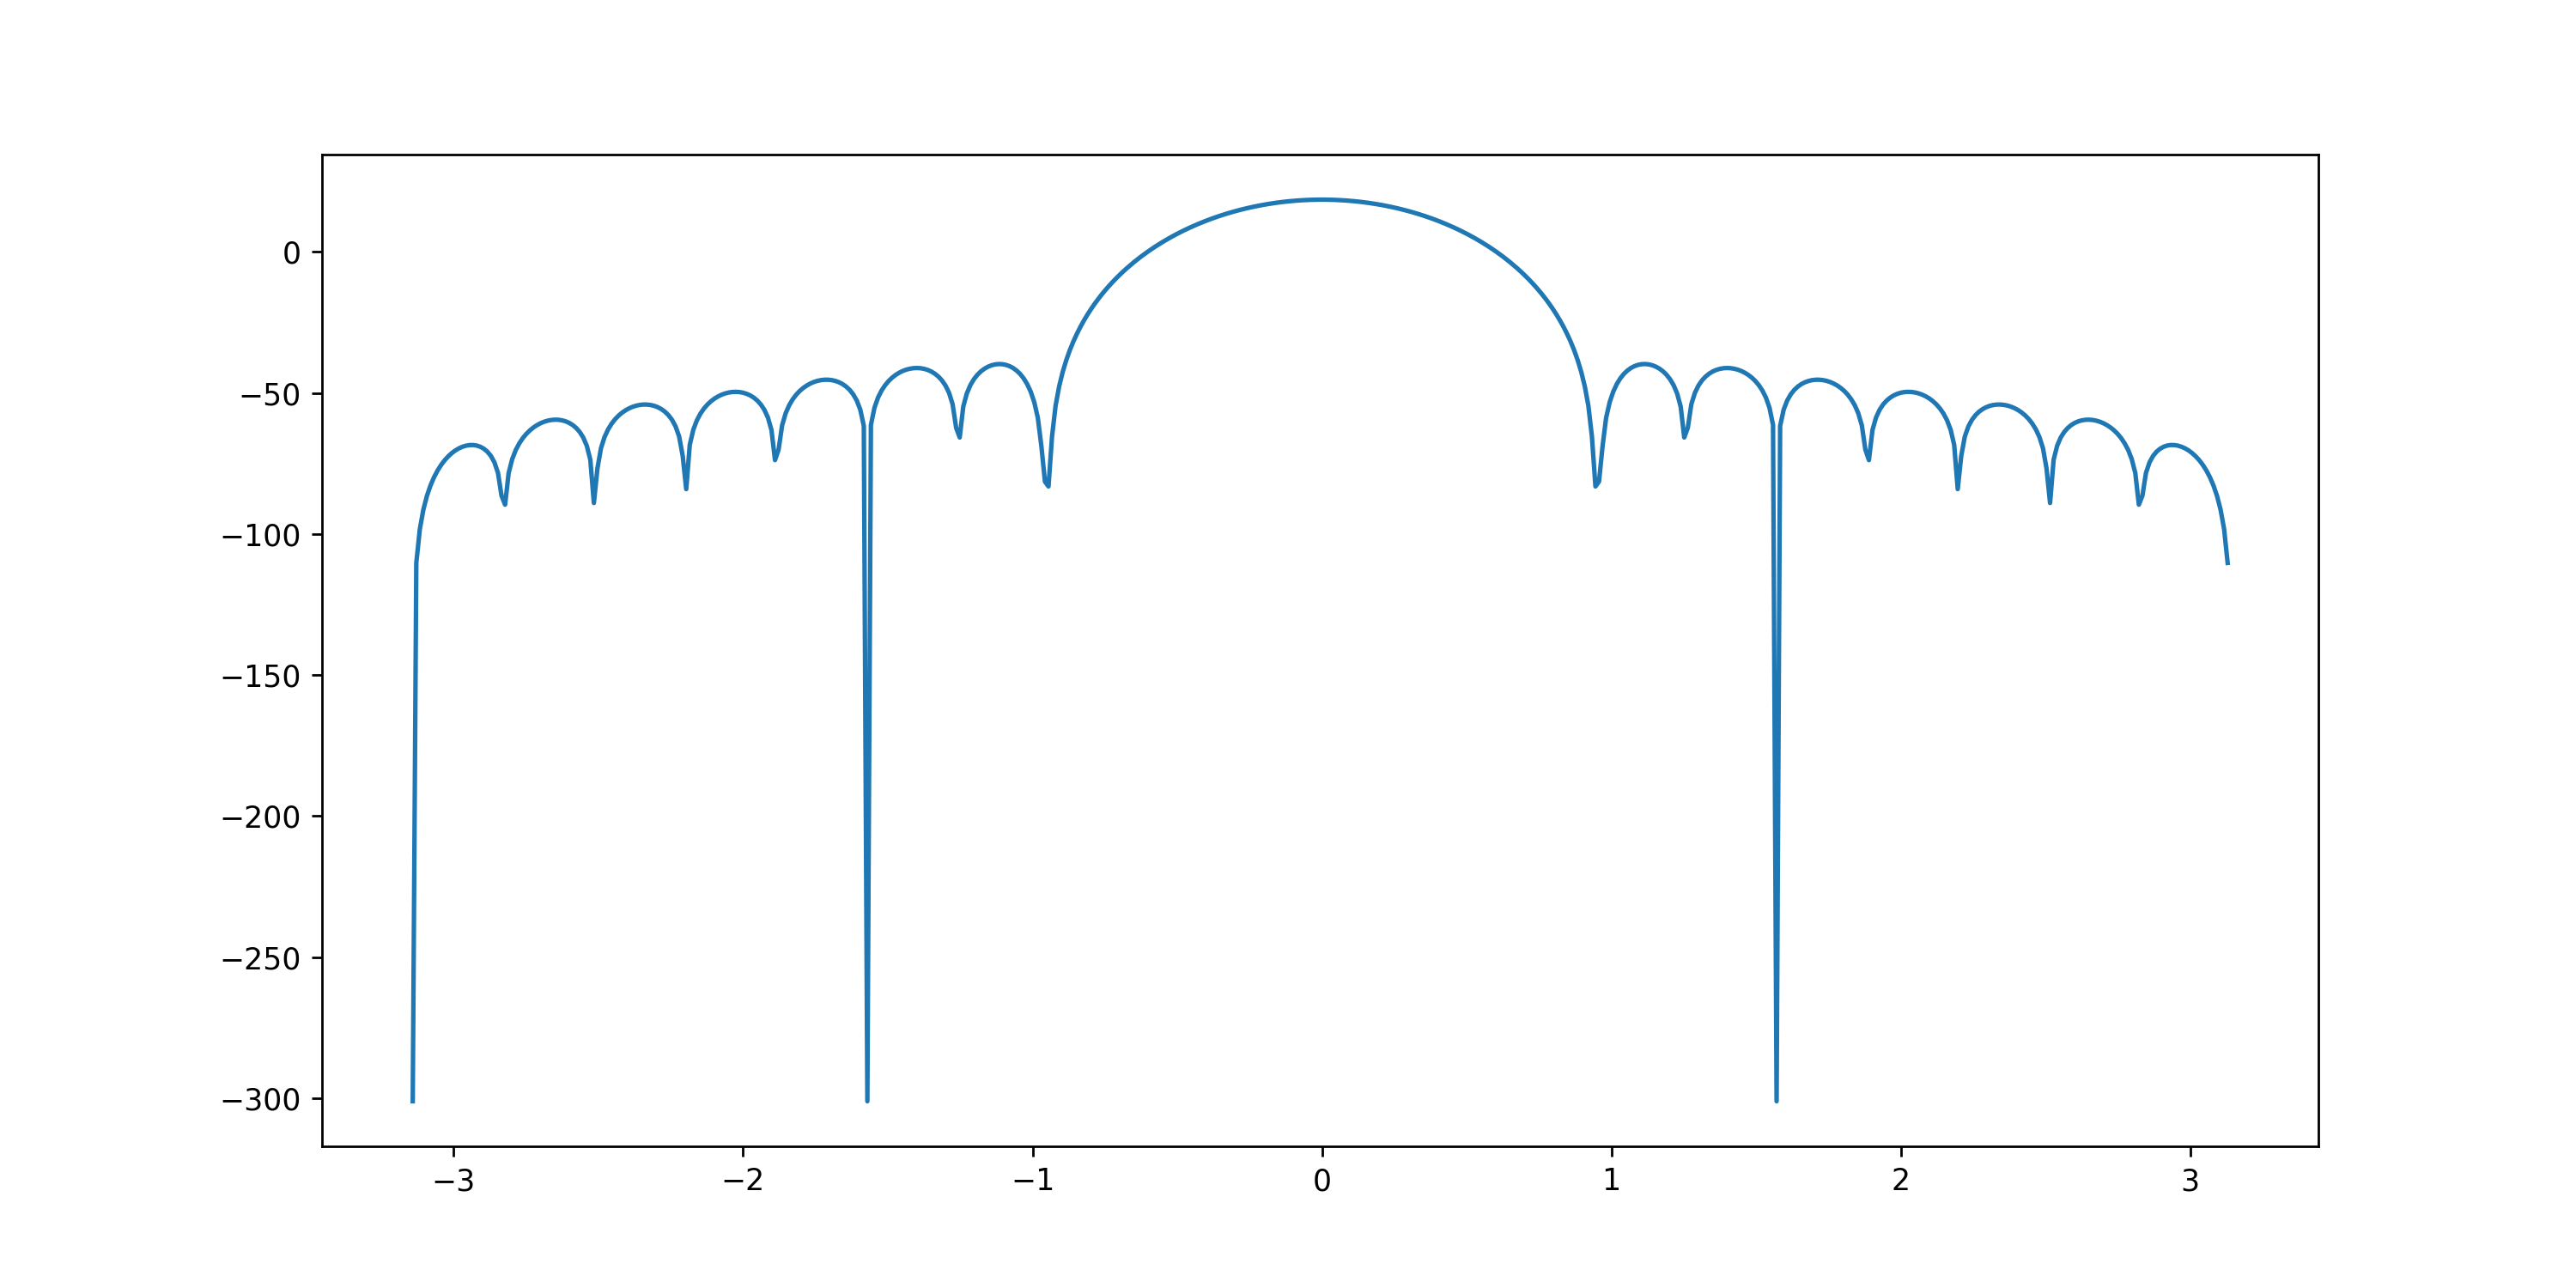

In [15]:
w_blackman_DTFT, w = DTFT(w_blackman, 512)

w_blackman_DTFT_mag = 20*np.log10(np.abs(w_blackman_DTFT))

plt.figure()
plt.plot(w, w_blackman_DTFT_mag)

**9. Measure the null-to-null mainlobe width (in rad/sample) and the peak-to-sidelobe amplitude (in dB) from the logarithmic magnitude response plot for each window type. Fill in the table below.**

|Window (length $N$)|Mainlobe Width (theoretical)|Mainlobe Width (experimental)|Peak-to-sidelobe Amplitude (dB) (theoretical)|Peak-to-sidelobe Amplitude (dB) (experimental)|
|:---:|:---:|:---:|:---:|:---:|
|Rectangular|4π/21|0.5|-13|-12|
|Hanning|8π/21|1.3|-32|-30|
|Hamming|8π/21|1.2|-43|-40|
|Blackman|12π/21|1.9|-58|-50|

---

After you obtain the measurements, run the following cell to make the plot not interactive.

In [16]:
# make the plot not interactive
%matplotlib inline
# specify the size of the plot
plt.rcParams['figure.figsize'] = (12, 6)

**10. Comment on how close the experimental results matched the ideal values and the relation between the width of the mainlobe and the peak-to-sidelobe amplitude.**

Very close. Generally, the bigger the mainlobe width, the largert the peak-to-sidlobe amplitude

**11. Now use a Hamming window to design a lowpass filter h(n) with a cutoff frequency of $\omega_c$ = 2.0 and length 21. Plot the filter’s impulse response.**

**Note**: You need to use equations (1) and (2) for this design.

<StemContainer object of 3 artists>

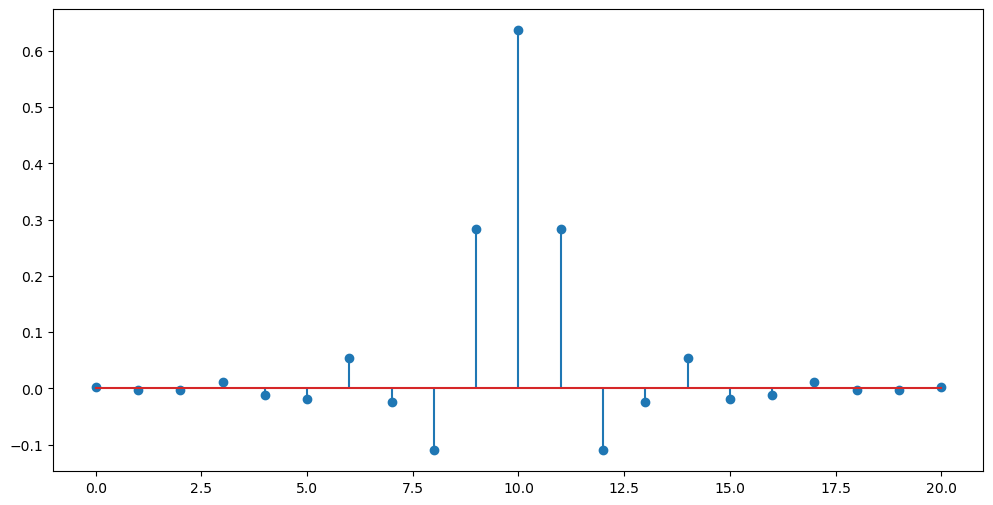

In [17]:
def LPFtrunc(N):
    wc = 2
    n = np.linspace(0, N-1, N)
    h = wc/np.pi*np.sinc(wc/np.pi*(n-(N-1)/2))
    return h

h = LPFtrunc(21)*w_hamming

plt.stem(n,h)

**12. Plot the magnitude of the filter’s DTFT in decibels.**

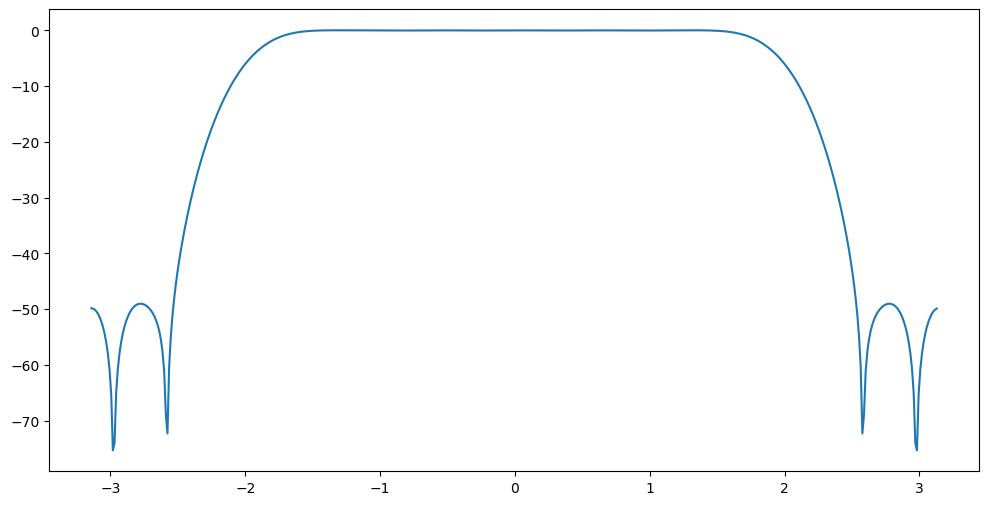

In [18]:
h_DTFT, w = DTFT(h, 512)

h_DTFT_mag = 20*np.log10(np.abs(h_DTFT))

plt.plot(w,h_DTFT_mag)

<h3 style="color:red;"><left>Exercise 3.1</left></h3>

To further investigate the Kaiser window, plot the Kaiser windows and their DTFT magnitudes (in dB) for $N = 21$ and the following values of $\beta$:

  * $\beta=0$
  * $\beta=1$
  * $\beta=5$
  
For each case use at least 512 points in the plot of the DTFT.

**Hint:** To create the Kaiser windows, use the command ```kaiser(N, beta)``` where `N` is the length of the filter and `beta` is the shape parameter $\beta$. To insure at least 512 points in the plot use the command `DTFT(window, 512)` when computing the DTFT.

**1. Plot the Kaiser window and the DTFT magnitude (in dB) for $\beta=0$.**

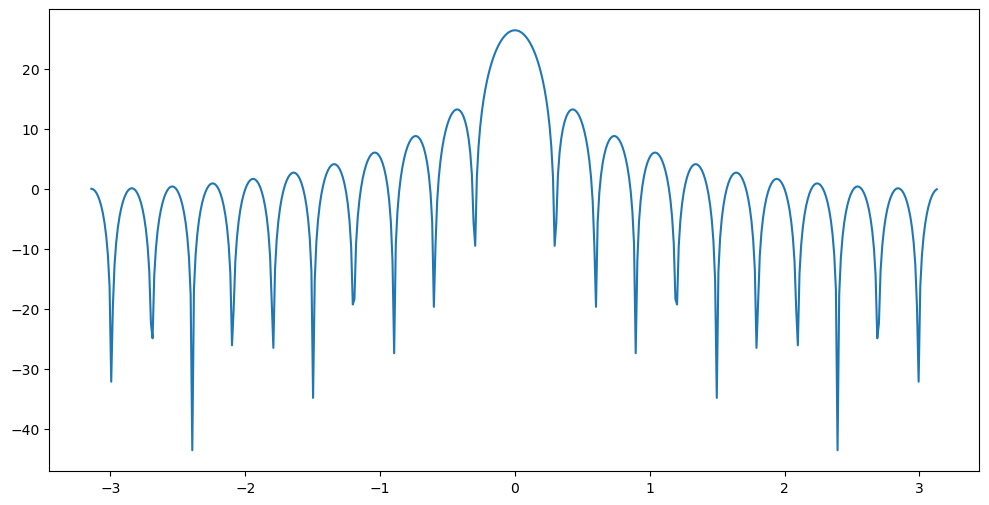

In [19]:
k_0 = kaiser(21, 0)
k_0_DTFT, w = DTFT(k_0, 512)
k_0_DTFT_mag = 20*np.log10(np.abs(k_0_DTFT))

plt.plot(w, k_0_DTFT_mag)

**2. Plot the Kaiser window and the DTFT magnitude (in dB) for $\beta=1$.**

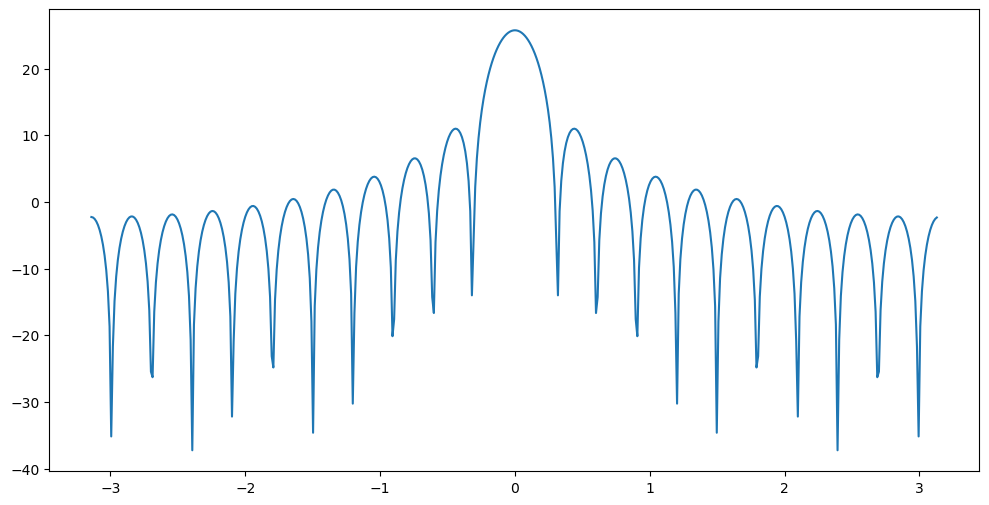

In [20]:
k_1 = kaiser(21, 1)
k_1_DTFT, w = DTFT(k_1, 512)
k_1_DTFT_mag = 20*np.log10(np.abs(k_1_DTFT))

plt.plot(w, k_1_DTFT_mag)

**3. Plot the Kaiser window and the DTFT magnitude (in dB) for $\beta=5$.**

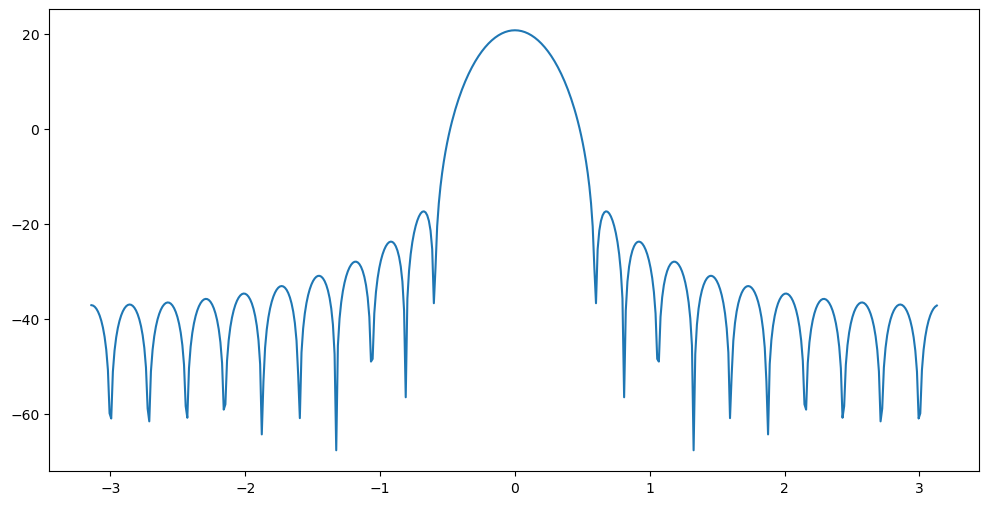

In [21]:
k_5 = kaiser(21, 5)
k_5_DTFT, w = DTFT(k_5, 512)
k_5_DTFT_mag = 20*np.log10(np.abs(k_5_DTFT))

plt.plot(w, k_5_DTFT_mag)

**4. Comment on how the value $\beta$ affects the shape of the window and the sidelobes of the DTFT.**

The value increase in beta increases the peak to sidelobe amplitude and mainlobe width

<h3 style="color:red;"><left>Exercise 3.2</left></h3>

**1. Use the kaiser window command to design a low pass filter using the specifications listed above. Print out the values of $\beta$ and $N$.**

In [22]:
delta_s = 0.005
delta_p = 0.05
ws = 2.2
wp = 1.8

delta = np.minimum(delta_s, delta_p)
A = -20*np.log10(delta)

def beta(A):
    if A < 21:
        beta = 0
    elif A <= 51:
        beta = 0.5842*(A-21)**0.4 + 0.07886*(A-21)
    else:
        beta = 0.1102*(A-8.7)
    
    return beta

N = np.ceil(1 + (A - 8)/(2.285*(ws-wp))).astype(int)
print(N)
be = beta(A)
print(be)

43
4.090903521438445


**2. Print out the value of $\omega_c$.**

In [23]:
wc = (wp + ws)/2
wc

2.0

**3. Plot the magnitude of the DTFT of the designed low pass filter for $|\omega| < \pi$.**

**Note:** Since the ripple is measured on a magnitude scale, DO NOT use a decibel scale on the plot.

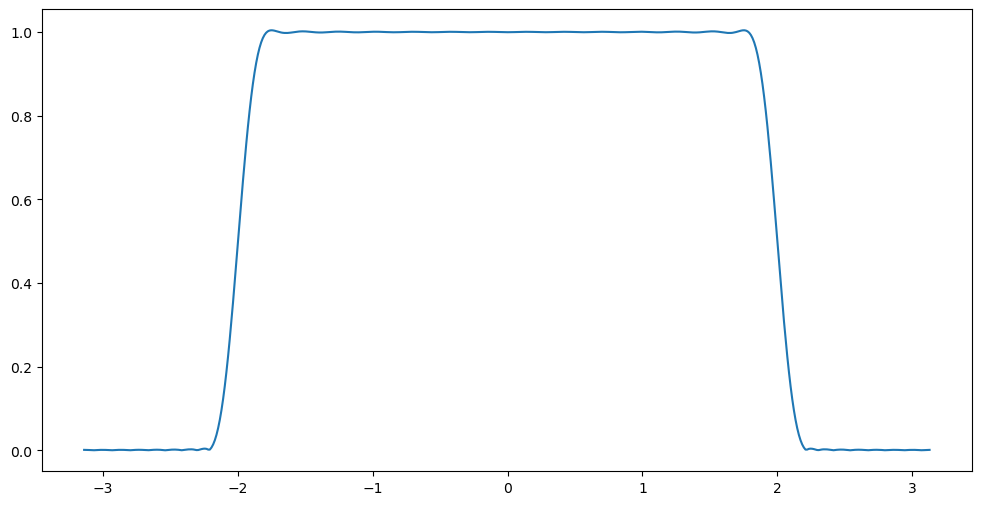

In [24]:
w_kaiser = kaiser(N, be)

h = LPFtrunc(N)*w_kaiser
h_DTFT, w = DTFT(h, 512)
h_DTFT_mag = np.abs(h_DTFT)

plt.plot(w, h_DTFT_mag)


**4. Now, plot the magnitude of the DTFT of the designed low pass filter for $|\omega| < \pi$ again, but the plot should show the passband ripple only. Save the plot by calling `plt.savefig("passband.png")` at the end.**

**Hint:** you may use [`plt.xlim()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlim.html) and [`plt.ylim()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylim.html).

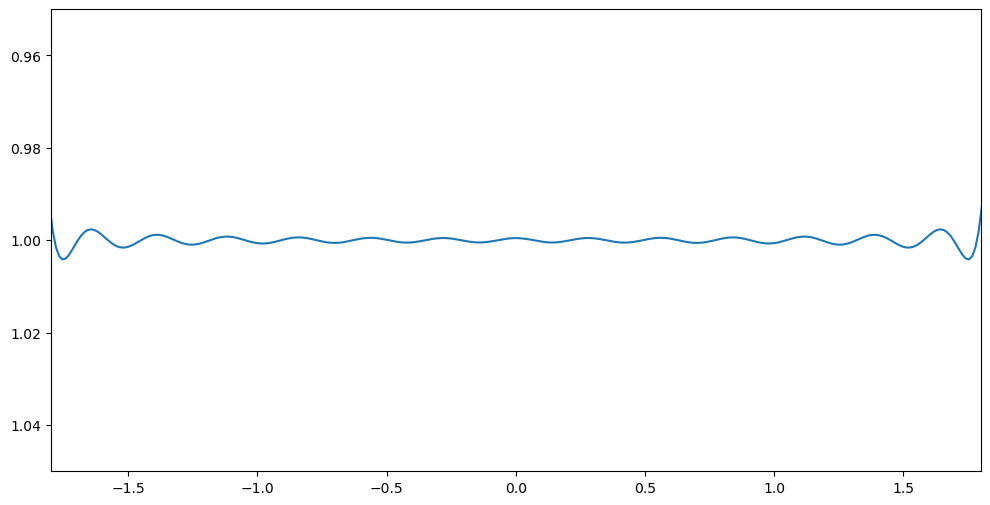

In [25]:
plt.xlim(-wp,wp)
plt.ylim(1+delta_p,1-delta_p)
plt.plot(w, h_DTFT_mag)
plt.savefig("passband.png")

**5. Now, plot the magnitude of the DTFT of the designed low pass filter for $|\omega| < \pi$ again, but the plot should show the stopband ripple only. Save the plot by calling `plt.savefig("stopband.png")` at the end.**

**Hint:** you may use [`plt.xlim()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlim.html) and [`plt.ylim()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylim.html).

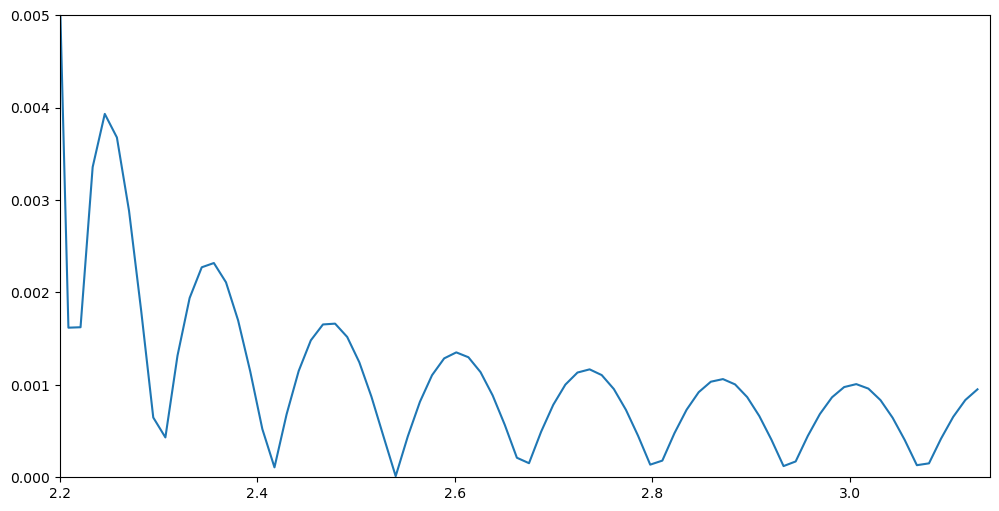

In [26]:
plt.xlim(ws,np.pi)
plt.ylim(0,delta_s)
plt.plot(w, h_DTFT_mag)
plt.savefig("stopband.png")

**6. On the saved image `passband.png`, mark $\omega_p$ and $\delta_p$ where appropiate, and attach the marked image here.**

<img src="passband_1.png">

**7. On the saved image `stopband.png`, mark $\omega_s$ and $\delta_s$ where appropiate, and attach the marked image here.**

<img src="stopband_1.png">

**8. Compute the stopband and passband ripple and display it to three decimal places (do not do this graphically). Do they meet the design specifications?**

**Hint:** Find the value of the DTFT at frequencies corresponding to the passband using the command `H[abs(w) <= 1.8]` where `H` is the DTFT of `h[n]` and `w` is the corresponding vector of frequencies. Then use this vector to compute the passband ripple. Use a similar procedure for the stopband ripple. 

In [27]:
p_max = np.max(h_DTFT_mag[abs(w) <= 1.8]) -1

print(np.round(p_max,3))
s_max = np.max(h_DTFT_mag[abs(w) >= 2.2])
print(np.round(s_max,3))

0.004
0.004


**9. Load the file ```nspeech2.npy``` using `np.load("nspeech2.npy")` and play it using the command ```ipd.Audio(nspeech2, rate=8000)```. Also, note the quality of the speech and background noise.**

In [28]:
nspeech2 = np.load("nspeech2.npy")

ipd.Audio(nspeech2, rate=8000)

There are background noise

**10. Apply the filter that you have designed to this signal. Then, compute the DTFT of 400 samples of the filtered signal starting at time `n = 20000`. Plot the magnitude of the DTFT samples in decibels versus frequency in radians for $|\omega<\pi|$.**

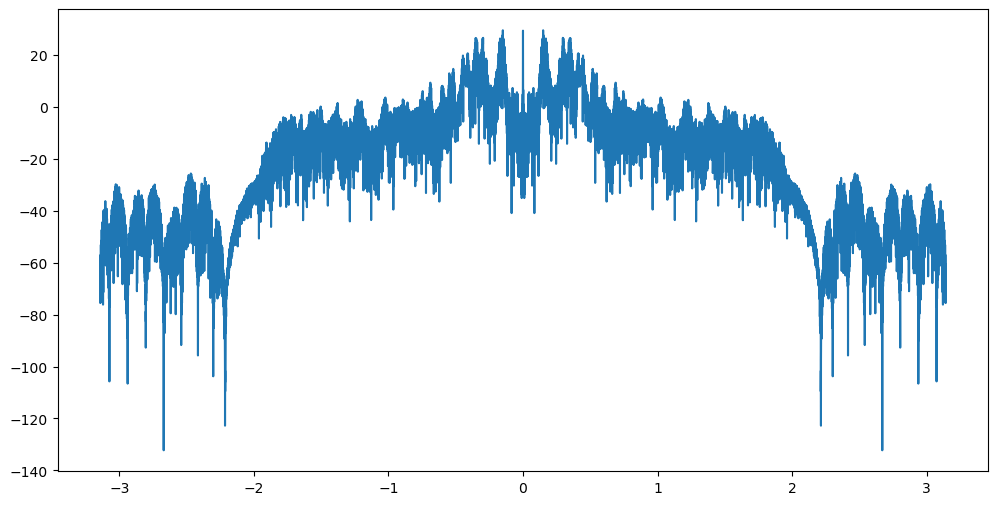

In [30]:
y = np.convolve(nspeech2[20000::1], h)
y_DTFT, w = DTFT(y, 512)
y_mag = 20*np.log10(np.abs(y_DTFT))

plt.plot(w, y_mag)

**11. Compare this plot with the spectrum of the noisy speech signal shown in Fig. 4. Play the noisy and filtered speech signals and listen to them carefully.**

In [31]:
ipd.Audio(y, rate=8000)

**12. Comment on how the frequency content and the audio quality of the filtered signal
have changed after filtering.**

The frequency spectrum have a bigger mainlope. The background noise are gone.

<h3 style="color:red;"><left>Exercise 4.1</left></h3>

**1. Design a symmetric FIR filter using `firpmord` and ```signal.remez``` to meet the design specifications given in Section 3.**

In [37]:
f = [wp, ws]
m = [1, 0]
ripple = [delta_p, delta_s]

n, fo, mo, w = firpmord(f, m, ripple, 2 * np.pi)
b = signal.remez(n + 1, fo, mo, w, fs=2*np.pi)
n

25

**2. Compute the DTFT of the filter’s response for at least 512 points, and use this result to compute the passband and stopband ripple of the filter that was designed.** 

In [34]:
b_DTFT, w_b = DTFT(b, 512)
b_DTFT_mag = np.abs(b_DTFT)

p_max = np.max(b_DTFT_mag[abs(w_b) <= 1.8]) -1

print(np.round(p_max,3))
s_max = np.max(b_DTFT_mag[abs(w_b) >= 2.2])
print(np.round(s_max,3))

0.055
0.005


**3. Plot the filter's DTFT in dB.**

C:\Users\rxw14\AppData\Local\Temp\ipykernel_31280\1960042055.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w_b, 20*np.log10(b_DTFT_mag))


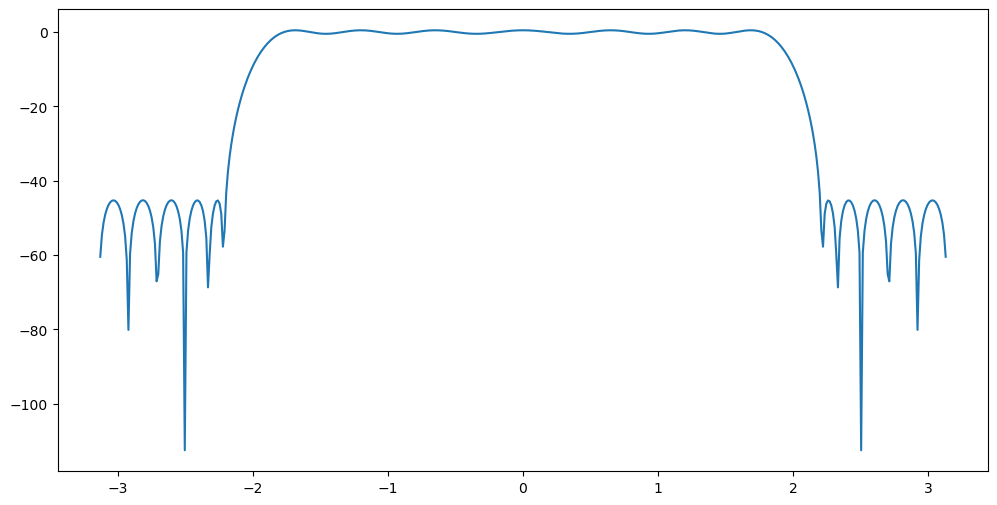

In [39]:
plt.plot(w_b, 20*np.log10(b_DTFT_mag))


**4. How accurate was the filter order computation using `firpmord` and `scipy.remez`? How does the length of this filter compare to the filter designed using a Kaiser window?**

The order/length is 25, and the original kaiser window length was 43. It is more or less accurate

**5. How does the frequency response of the Parks-McClellan filter compare to the filter designed using the Kaiser window? Comment on the shape of both the passband and stopband.**

The ripple on mainlope is significantly bigger. stop band ripple is obvious too.

<h3 style="color:red;"><left>Exercise 4.2</left></h3>

**1. Use the filter you have designed to remove the noise from the signal `nspeech2.npy`. Play the noisy and filtered speech signals back using sound and listen to them carefully.**

In [40]:
# noisy speech signal
nspeech2 = np.load("nspeech2.npy")

ipd.Audio(nspeech2, rate=8000)

In [41]:
y1 = np.convolve(nspeech2, b)

ipd.Audio(y1, rate=8000)

**2. Comment on how the audio quality of the signal changes after filtering. Also comment on any differences in audio quality between the Parks-McClellan filtered speech and the Kaiser filtered speech.**

The audio quality is ok. Kaiser filtered speech is better than Parks-McClellan filtered speech.

**3. Compute the DTFT of 400 samples of the filtered signal starting at time `n = 20000` (i.e., `[20000:20400]`). Plot the magnitude of the DTFT in decibels versus frequency in radians for $|\omega| < \pi$.**

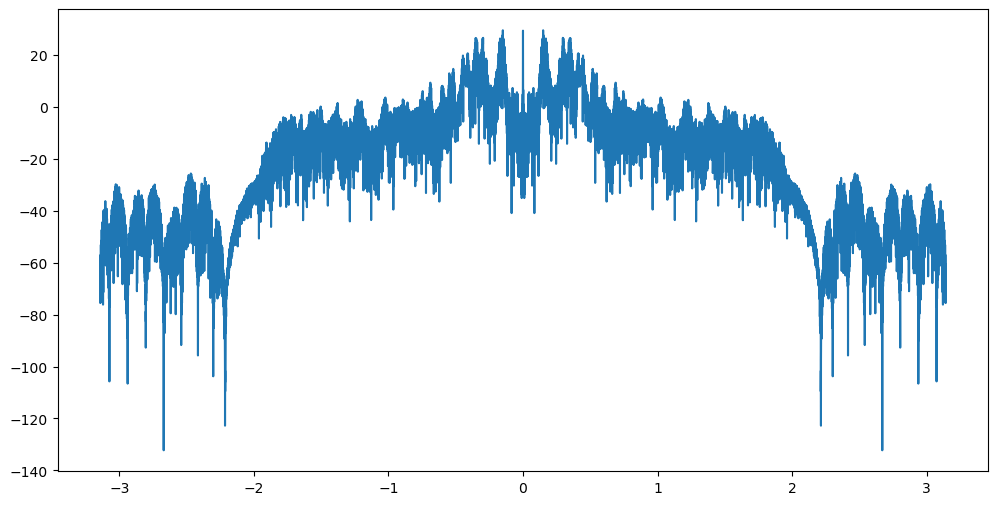

In [48]:
y1 = np.convolve(nspeech2[20000:20400], b)
y1_DTFT, w = DTFT(y, 400)
y1_mag = 20*np.log10(np.abs(y_DTFT))


plt.plot(w, y1_mag)


**4. Compare this with the spectrum of the noisy speech signal shown in Fig. 4, and also with the magnitude of the DTFT of the Kaiser filtered signal.**

This spectrum is very similar compare with Kaiser filtered signal in magnitude.

<h3 style="color:red;"><left>Exercise 5</left></h3>

**1. Write a function with the following syntax that computes the frequency response $H_\theta(e^{j\omega})$:**
```python
def prefilter(w, theta):
    """
    Parameters:
    ---
    w: the vector of input frequencies
    theta: the parameter vector
    
    Returns:
    ---
    H: the frequency response from equation (6)
    """
    H = None
    return H
```

In [56]:
# insert your code here
def prefilter(w, theta):
    """
    Parameters:
    ---
    w: the vector of input frequencies
    theta: the parameter vector
    
    Returns:
    ---
    H: the frequency response from equation (6)
    """
    
    H = (theta[0] + theta[1]*np.exp(-1j*w) + theta[2]*np.exp(-2j*w)) / (1 + theta[3]*np.exp(-1j*w) + theta[4]*np.exp(-2j*w))
    return H



**2. Write a function with the following syntax to compute the total squared error of equation (7):**
```python
def cost(theta):
    """
    Parameters:
    ---
    theta: the parameter vector
    
    Returns:
    ---
    C: the computed total squared error of equation (7)
    """
    C = None
    return C
``` 
**Use a sampling interval $\Delta\omega=0.01$ for the functions $H_\theta(e^{j\omega})$ and $1/H_\text{sh}(e^{j\omega})$.**

In [75]:
# insert your code here
def cost(theta):
    """
    Parameters:
    ---
    theta: the parameter vector
    
    Returns:
    ---
    C: the computed total squared error of equation (7)
    """
    w = np.linspace(-np.pi, np.pi, (np.round(np.pi/0.01)).astype(int) +1)
    temp = (np.abs(1/(np.sinc(w/(2*np.pi)))) - prefilter(w, theta))**2
    
    C = [0]*((np.round(np.pi/0.01)).astype(int)+1)
    C[0] = 0
    
    for i in range(1,len(w),1):
        C[i] = C[i-1] + temp[i]
    
    return C[(np.round(np.pi/0.01)).astype(int)]

**3. Use the function [```optimize.fmin```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin.html) from the ```scipy``` library to compute the value of the parameter $\theta$ which minimizes `Cost(theta)`. The function has the following syntax:**
```python
def optimize.fmin(func_name, init_param)
    """
    Parameters
    ---
    func_name: the name of the function being minimized (cost)
    init_param: the starting value for the unknown parameter
    
    Returns:
    ---
    param: the parameter that minimizes the function
    return param
```
**Choose an initial value of $(\theta_1, \theta_2, \theta_3, \theta_4, \theta_5) = (1, 0, 0, 0, 0)$ so that $H_\theta(e^{j\omega}) = 1$.**

In [79]:
theta = [1,0,0,0,0]

opt = scipy.optimize.fmin(cost, theta)


w = np.linspace(-np.pi, np.pi, (np.round(np.pi/0.01)).astype(int) +1)

H_theta = prefilter(w, opt)

opt

C:\Users\rxw14\AppData\Local\Temp\ipykernel_31280\2540690774.py:3: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  opt = scipy.optimize.fmin(cost, theta)


array([ 0.27309753, -0.84371803,  2.50065963,  1.27361412,  1.        ])

**4. Give an analytical expression for the optimized transfer function $H_{θ^∗}(z)$ with the coefficients that were computed.**

H = (0.273 - 0.844*np.exp(-1j*w) + 2.5*np.exp(-2j*w)) / (1 + 1.27*np.exp(-1j*w) + np.exp(-2j*w))



**5. Plot the desired filter magnitude response $\frac{1}{H_{\text{sh}}(e^{j\omega})}$ on the interval `[-np.pi, np.pi]`.**

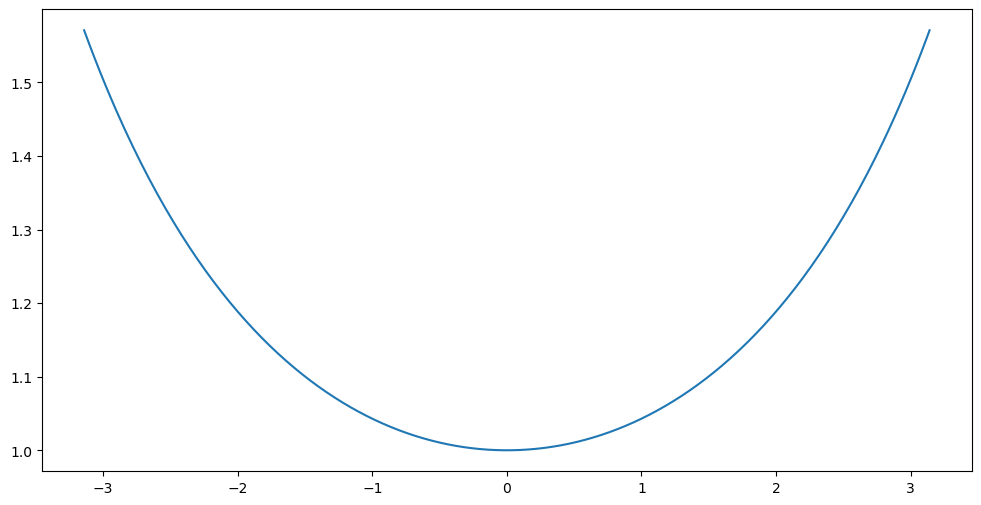

In [80]:
H_sh_inverse = 1/(np.sinc(w/(2*np.pi)))

plt.plot(w, H_sh_inverse)

**6. Plot the designed IIR filter magnitude response $|H_{\theta^∗} (e^{j\omega})|$ on the interval `[-np.pi, np.pi]`.**

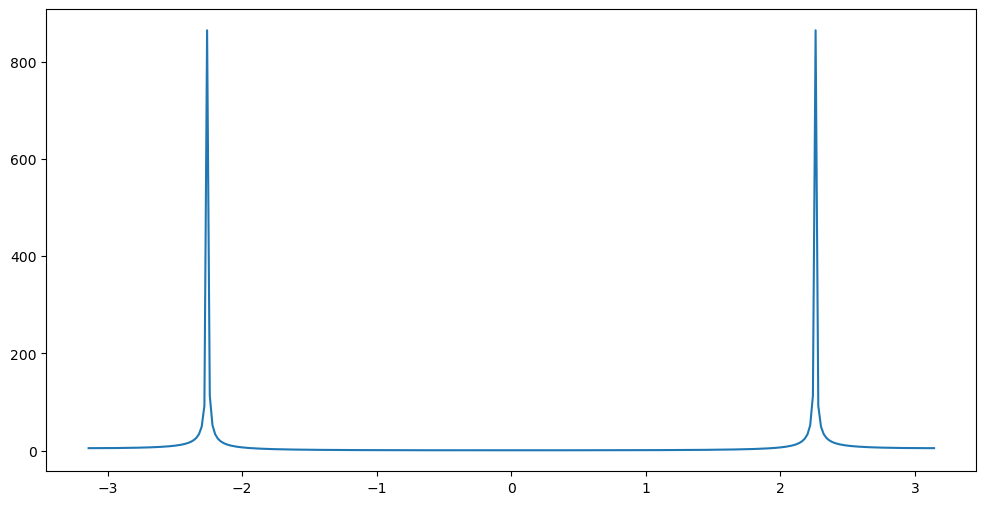

In [81]:
H_theta = (0.273 - 0.844*np.exp(-1j*w) + 2.5*np.exp(-2j*w)) / (1 + 1.27*np.exp(-1j*w) + np.exp(-2j*w))

H_theta_abs = np.abs(H_theta)

plt.plot(w, H_theta_abs)

**7. Plot the error in decibels, from equation (8) on the interval `[-np.pi, np.pi]`.**

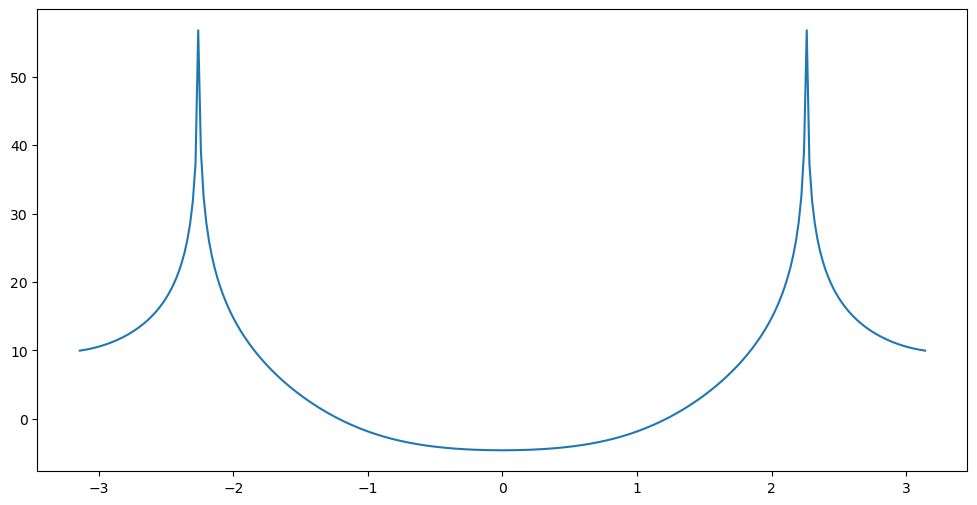

In [82]:
Err = 20*np.log10(H_theta_abs/H_sh_inverse)

plt.plot(w, Err)

**8. By looking at the error plot, indicate the frequency ranges where the approximation error is high.**

The error is high when it's near the desired frequency.